# Autoregression Moving Average model

## O que é?

O modelo ARMA é uma combinação dos modelos AR e MA.

O modelo ARMA (_p_,_q_) possui _p_ ordens de autoregressão e _q_ ordens de média móvel. É modelado seguindo a seguinte equação:

$y_t=\mu + \beta_1*y_{t-1} + \phi_1*\epsilon_{t-1} + \epsilon_t$

Onde $\mu$ é constante, $\beta$ se refere ao coeficiente do modelo AR que acompanha o valor do último registro ($y_t-1$), $\phi$ é o coeficiente do modelo MA que acompanha o erro na previsão do último registro e $\epsilon_t$ é o erro entre a previsão e o valor real.

Recomendado para séries que não apresentem tendências ou sazonalidade

## Exemplo prático:

In [1]:
#Importando bibliotecas básicas

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pylab
from datetime import datetime

%matplotlib inline

In [2]:
# Lendo arquivo CSV contendo data e número de passageiros no vôo
df = pd.read_csv('Datasets/AirPassengers.csv')

#Definindo as datas como índice
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')
df = df.rename(columns={"#Passengers":"Passengers"})
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Autocorrelação

Ao analisar a auto correlação dos dados podemos identificar possíveis valores para _p_ e _q_:

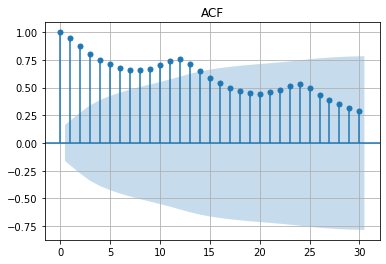

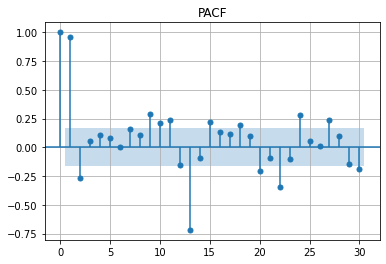

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df, title='ACF', lags=30)
plt.grid()

plot_pacf(df, title = 'PACF', lags=30)
plt.grid()

plt.show()

Para identificar possíveis valores das ordens _p_ e _q_ é preciso analisar as correlações.

_p_ : a ordem de _p_ (ordem da autorregressão) pode ser selecionada de acordo com o gráfico de autocorrelações parciais, levando em conta a quantidade de hastes fora da zona azul. (A zona azul é a zona de erro, onde os valores dentro dela não tem significância estatística).

_q_ : o valor de _q_ (ordem da média móvel) pode ser selecionado de acordo com o número de hastes fora da zona de erro do gráfico de autocorrelações.

### Treino e teste

In [15]:
def train_test (data):
    train_size = int(len(data)*.75)
    train = df[:train_size]
    test = df[train_size:]
    return train, test

train, test = train_test(df)

### Criando modelo ARMA

In [84]:
from statsmodels.tsa.arima_model import ARMA

#P = 3 e Q = 5

arma_model = ARMA(endog = df, order = (3, 5), freq = 'MS')

arma_fit = arma_model.fit()

arma_pred = arma_fit.predict(start = datetime(1949,1,1), end = datetime(1961, 4, 1))

C:\Users\mpere\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mpere\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inver

### Calculando erro entre os dados de teste e as previsões

In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def get_rmse (real, predicted):
    rmse = sqrt(mean_squared_error(real, predicted))
    print('Test RMSE: %.3f' % rmse)
    
get_rmse(df['Passengers'][1:], arma_pred[1:int(len(df))])

Test RMSE: 24.749


### Plotando resultados

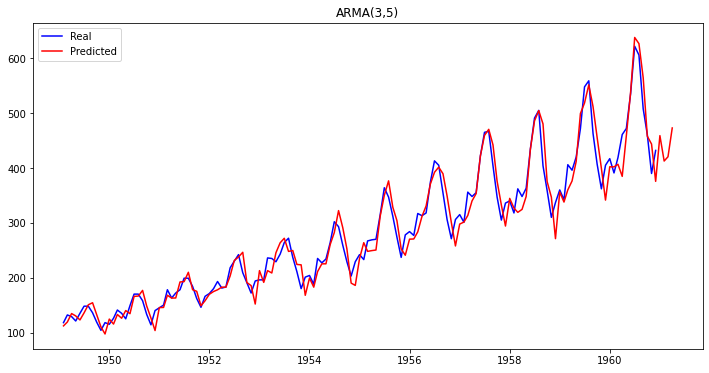

In [86]:
plt.figure(figsize = (12,6))

plt.plot(df[1:], color = 'blue')
plt.plot(arma_pred[1:], color = 'red')

plt.title('ARMA(3,5)')
plt.legend(['Real','Predicted'])

plt.show()

### Conclusão

Os modelos MA, ARMA não foram bons nas previsões pois foram capazes de prever poucos valores à frente, pois a partir de _q_ intervalos as previsões mantém uma média constante, o modelo AR conseguiu prever mais valores, ainda mais quando definido o parâmetro Sazonal

| Correlação | __AR(_p_)__  |  __MA(_q_)__  | __ARMA__ |
|------------|--------------|---------------|----------|
|  ACF       |Queda gradual |Queda brusca a partir de _q_|Sem quedas bruscas|
|  PACF      |Queda brusca a partir de _p_|Queda gradual|Sem quedas bruscas|

_Practical Time Series Analysis Prediction with Statistics & Machine Learning - página 187_